<a href="https://colab.research.google.com/github/NarineKhachatryan/task_fraud/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22fraud_task_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df1=pd.read_csv("fraud_profile.csv")

In [ ]:

df1.head()

,user,fraud,email_domain,ip_asn,signup_datetime,gender,marital,employment,pet
0,1000000,0,c,11202,2020-05-03 17:29:33,1.0,Married,i,['No pets']
1,1000015,0,f,11202,2020-05-03 17:32:33,1.0,Married,d,['Cat']
2,1000019,0,c,11202,2020-05-03 17:33:52,1.0,Single,f,['No pets']
3,1000045,0,c,11202,2020-05-03 17:37:58,1.0,Married,f,['No pets']
4,1000076,0,c,11202,2020-05-03 17:42:42,0.0,Single,b,['No pets']


In [ ]:
df1['fraud'].value_counts()# not balanced

0    62311
1     7972
Name: fraud, dtype: int64

In [ ]:
(7972/62311)*100

12.79388871948773

In [ ]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70283 entries, 0 to 70282
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user             70283 non-null  int64  
 1   fraud            70283 non-null  int64  
 2   email_domain     70283 non-null  object 
 3   ip_asn           70283 non-null  int64  
 4   signup_datetime  70283 non-null  object 
 5   gender           70021 non-null  float64
 6   marital          70282 non-null  object 
 7   employment       70272 non-null  object 
 8   pet              70271 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.8+ MB


In [ ]:
df1.nunique()

user               70279
fraud                  2
email_domain           7
ip_asn              2133
signup_datetime    66719
gender                 2
marital                3
employment            11
pet                  606
dtype: int64

In [ ]:

df1.isna().sum()

user                 0
fraud                0
email_domain         0
ip_asn               0
signup_datetime      0
gender             262
marital              1
employment          11
pet                 12
dtype: int64

In [ ]:

df2=pd.read_csv("fraud_behavior.csv")

In [ ]:
df2.head()

,user,click_time,length_of_activity_in_minutes,promised_reward,ip_asn,postback_time,activity_status,gained_reward
0,1000000,2020-05-03 17:33:15,25.0,12300.0,11202.0,2020-05-03 17:33:50,rejection_type_2,369.0
1,1000000,2020-05-03 17:33:50,25.0,12300.0,11202.0,NaN,NaN,NaN
2,1000002,2020-05-03 17:34:02,25.0,12300.0,11678.0,2020-05-03 17:34:40,rejection_type_2,369.0
3,1000007,2020-05-03 17:34:12,25.0,6150.0,10066.0,NaN,NaN,NaN
4,1000002,2020-05-03 17:34:40,25.0,12300.0,11678.0,NaN,NaN,NaN


In [ ]:
df1['user'].all()==df2['user'].all()

True

In [ ]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user                           32484 non-null  int64  
 1   click_time                     32484 non-null  object 
 2   length_of_activity_in_minutes  32483 non-null  float64
 3   promised_reward                32483 non-null  float64
 4   ip_asn                         32483 non-null  float64
 5   postback_time                  12990 non-null  object 
 6   activity_status                12946 non-null  object 
 7   gained_reward                  12990 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df2.nunique()

user                              2754
click_time                       20019
length_of_activity_in_minutes       35
promised_reward                     68
ip_asn                             328
postback_time                    10498
activity_status                      6
gained_reward                       44
dtype: int64

In [ ]:
df2.isna().sum()

user                                 0
click_time                           0
length_of_activity_in_minutes        1
promised_reward                      1
ip_asn                               1
postback_time                    19494
activity_status                  19538
gained_reward                    19494
dtype: int64

In [ ]:
df=pd.merge(df1,df2,on="user")

In [ ]:
df.shape

(32484, 16)

In [ ]:
df.tail(10)

,user,fraud,email_domain,ip_asn_x,signup_datetime,gender,marital,employment,pet,click_time,length_of_activity_in_minutes,promised_reward,ip_asn_y,postback_time,activity_status,gained_reward
32474,1004770,0,c,10173,2020-05-04 06:43:01,0.0,Married,f,['Cat'],2020-05-04 06:51:50,20.0,6765.0,10173.0,2020-05-04 06:51:50,rejection_type_5,0.0
32475,1004770,0,c,10173,2020-05-04 06:43:01,0.0,Married,f,['Cat'],2020-05-04 06:54:26,15.0,4920.0,10173.0,2020-05-04 06:55:07,rejection_type_1,246.0
32476,1004770,0,c,10173,2020-05-04 06:43:01,0.0,Married,f,['Cat'],2020-05-04 06:55:07,15.0,4920.0,10173.0,NaN,NaN,NaN
32477,1004770,0,c,10173,2020-05-04 06:43:01,0.0,Married,f,['Cat'],2020-05-04 06:55:13,20.0,6765.0,10173.0,2020-05-04 07:24:17,successfull,6765.0
32478,1004804,0,c,10543,2020-05-04 06:46:15,0.0,Married,i,"['Dog', 'Cat']",2020-05-04 06:52:08,15.0,7380.0,10543.0,2020-05-04 06:52:36,rejection_type_4,0.0
32479,1004804,0,c,10543,2020-05-04 06:46:15,0.0,Married,i,"['Dog', 'Cat']",2020-05-04 06:52:36,15.0,7380.0,10543.0,NaN,NaN,NaN
32480,1004804,0,c,10543,2020-05-04 06:46:15,0.0,Married,i,"['Dog', 'Cat']",2020-05-04 06:55:20,20.0,6765.0,10543.0,NaN,NaN,NaN
32481,1004810,0,c,11714,2020-05-04 06:47:05,0.0,Married,d,['Cat'],2020-05-04 06:51:00,15.0,6150.0,11714.0,2020-05-04 07:03:29,successfull,6150.0
32482,1004861,0,c,10631,2020-05-04 06:50:19,0.0,Single,b,"['Dog', 'Cat']",2020-05-04 06:54:17,10.0,7380.0,10631.0,2020-05-04 07:14:15,successfull,7380.0
32483,1004924,0,c,12383,2020-05-04 06:55:02,0.0,Married,i,['No pets'],2020-05-04 06:57:53,9.0,4920.0,12383.0,2020-05-04 07:17:43,successfull,4920.0


In [ ]:
df['fraud'].value_counts()

0    25090
1     7394
Name: fraud, dtype: int64

In [ ]:
(986731/2543290)*100

38.797423809317856

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32484 entries, 0 to 32483
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user                           32484 non-null  int64  
 1   fraud                          32484 non-null  int64  
 2   email_domain                   32484 non-null  object 
 3   ip_asn_x                       32484 non-null  int64  
 4   signup_datetime                32484 non-null  object 
 5   gender                         32325 non-null  float64
 6   marital                        32484 non-null  object 
 7   employment                     32484 non-null  object 
 8   pet                            32484 non-null  object 
 9   click_time                     32484 non-null  object 
 10  length_of_activity_in_minutes  32483 non-null  float64
 11  promised_reward                32483 non-null  float64
 12  ip_asn_y                       32483 non-null 

In [ ]:
df.isna().sum()

user                                 0
fraud                                0
email_domain                         0
ip_asn_x                             0
signup_datetime                      0
gender                             159
marital                              0
employment                           0
pet                                  0
click_time                           0
length_of_activity_in_minutes        1
promised_reward                      1
ip_asn_y                             1
postback_time                    19494
activity_status                  19538
gained_reward                    19494
dtype: int64

In [ ]:
df.nunique()

user                              2754
fraud                                2
email_domain                         7
ip_asn_x                           318
signup_datetime                   2674
gender                               2
marital                              3
employment                          11
pet                                131
click_time                       20019
length_of_activity_in_minutes       35
promised_reward                     68
ip_asn_y                           328
postback_time                    10498
activity_status                      6
gained_reward                       44
dtype: int64

In [ ]:
df["gained_reward"]=df["gained_reward"].fillna(0)

In [ ]:
df.drop('pet',axis=1,inplace=True)
df.drop('activity_status',axis=1,inplace=True)

In [ ]:
df.isna().sum()

user                                 0
fraud                                0
email_domain                         0
ip_asn_x                             0
signup_datetime                      0
gender                             159
marital                              0
employment                           0
click_time                           0
length_of_activity_in_minutes        1
promised_reward                      1
ip_asn_y                             1
postback_time                    19494
gained_reward                        0
dtype: int64

In [ ]:
df.sort_values('user').head()

,user,fraud,email_domain,ip_asn_x,signup_datetime,gender,marital,employment,click_time,length_of_activity_in_minutes,promised_reward,ip_asn_y,postback_time,gained_reward
0,1000000,0,c,11202,2020-05-03 17:29:33,1.0,Married,i,2020-05-03 17:33:15,25.0,12300.0,11202.0,2020-05-03 17:33:50,369.0
1,1000000,0,c,11202,2020-05-03 17:29:33,1.0,Married,i,2020-05-03 17:33:50,25.0,12300.0,11202.0,NaN,0.0
2633,1000002,0,c,11678,2020-05-03 17:29:44,1.0,Married,i,2020-05-03 17:36:14,9.0,4920.0,11678.0,NaN,0.0
2632,1000002,0,c,11678,2020-05-03 17:29:44,1.0,Married,i,2020-05-03 17:34:56,9.0,4920.0,11678.0,2020-05-03 17:36:14,246.0
2631,1000002,0,c,11678,2020-05-03 17:29:44,1.0,Married,i,2020-05-03 17:34:40,25.0,12300.0,11678.0,NaN,0.0


In [ ]:
df.head()

,user,fraud,email_domain,ip_asn_x,signup_datetime,gender,marital,employment,click_time,length_of_activity_in_minutes,promised_reward,ip_asn_y,postback_time,gained_reward
0,1000000,0,c,11202,2020-05-03 17:29:33,1.0,Married,i,2020-05-03 17:33:15,25.0,12300.0,11202.0,2020-05-03 17:33:50,369.0
1,1000000,0,c,11202,2020-05-03 17:29:33,1.0,Married,i,2020-05-03 17:33:50,25.0,12300.0,11202.0,NaN,0.0
2,1000015,0,f,11202,2020-05-03 17:32:33,1.0,Married,d,2020-05-03 17:36:38,2.0,3075.0,11202.0,2020-05-03 17:38:03,246.0
3,1000015,0,f,11202,2020-05-03 17:32:33,1.0,Married,d,2020-05-03 17:38:03,2.0,3075.0,11202.0,NaN,0.0
4,1000015,0,f,11202,2020-05-03 17:32:33,1.0,Married,d,2020-05-03 17:38:46,15.0,7380.0,11202.0,2020-05-03 17:57:01,7380.0


In [ ]:
df['activity_duration']=pd. to_datetime(df['postback_time'])-pd. to_datetime(df['click_time'])
df['activity_duration']

0       0 days 00:00:35
1                   NaT
2       0 days 00:01:25
3                   NaT
4       0 days 00:18:15
              ...      
32479               NaT
32480               NaT
32481   0 days 00:12:29
32482   0 days 00:19:58
32483   0 days 00:19:50
Name: activity_duration, Length: 32484, dtype: timedelta64[ns]

In [ ]:
df['activity_duration']=df['activity_duration'].dt.total_seconds()

In [ ]:
df['activity_duration']

0          35.0
1           NaN
2          85.0
3           NaN
4        1095.0
          ...  
32479       NaN
32480       NaN
32481     749.0
32482    1198.0
32483    1190.0
Name: activity_duration, Length: 32484, dtype: float64

In [ ]:
df['length_of_activity_in_minutes']=df['length_of_activity_in_minutes'].apply(lambda x:x*60.0)

In [ ]:
df['activity_duration']=df['activity_duration'].fillna(0)

In [ ]:
df.head()

,user,fraud,email_domain,ip_asn_x,signup_datetime,gender,marital,employment,click_time,length_of_activity_in_minutes,promised_reward,ip_asn_y,postback_time,gained_reward,activity_duration
0,1000000,0,c,11202,2020-05-03 17:29:33,1.0,Married,i,2020-05-03 17:33:15,1500.0,12300.0,11202.0,2020-05-03 17:33:50,369.0,35.0
1,1000000,0,c,11202,2020-05-03 17:29:33,1.0,Married,i,2020-05-03 17:33:50,1500.0,12300.0,11202.0,NaN,0.0,0.0
2,1000015,0,f,11202,2020-05-03 17:32:33,1.0,Married,d,2020-05-03 17:36:38,120.0,3075.0,11202.0,2020-05-03 17:38:03,246.0,85.0
3,1000015,0,f,11202,2020-05-03 17:32:33,1.0,Married,d,2020-05-03 17:38:03,120.0,3075.0,11202.0,NaN,0.0,0.0
4,1000015,0,f,11202,2020-05-03 17:32:33,1.0,Married,d,2020-05-03 17:38:46,900.0,7380.0,11202.0,2020-05-03 17:57:01,7380.0,1095.0


In [ ]:

#df["signup_datetime"]=df["signup_datetime"].apply(lambda x: x.replace('-','')).apply(lambda x:x.replace(':','')).apply(lambda x:x.replace(' ',''))

In [ ]:
df.drop(['signup_datetime','click_time','postback_time'],axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32484 entries, 0 to 32483
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user                           32484 non-null  int64  
 1   fraud                          32484 non-null  int64  
 2   email_domain                   32484 non-null  object 
 3   ip_asn_x                       32484 non-null  int64  
 4   gender                         32325 non-null  float64
 5   marital                        32484 non-null  object 
 6   employment                     32484 non-null  object 
 7   length_of_activity_in_minutes  32483 non-null  float64
 8   promised_reward                32483 non-null  float64
 9   ip_asn_y                       32483 non-null  float64
 10  gained_reward                  32484 non-null  float64
 11  activity_duration              32484 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usag

In [ ]:
target=df["fraud"]

In [ ]:
data=df[df.columns.difference(['fraud'])]
data.head()

,activity_duration,email_domain,employment,gained_reward,gender,ip_asn_x,ip_asn_y,length_of_activity_in_minutes,marital,promised_reward,user
0,35.0,c,i,369.0,1.0,11202,11202.0,1500.0,Married,12300.0,1000000
1,0.0,c,i,0.0,1.0,11202,11202.0,1500.0,Married,12300.0,1000000
2,85.0,f,d,246.0,1.0,11202,11202.0,120.0,Married,3075.0,1000015
3,0.0,f,d,0.0,1.0,11202,11202.0,120.0,Married,3075.0,1000015
4,1095.0,f,d,7380.0,1.0,11202,11202.0,900.0,Married,7380.0,1000015


In [ ]:
data.columns

Index(['activity_duration', 'email_domain', 'employment', 'gained_reward',
       'gender', 'ip_asn_x', 'ip_asn_y', 'length_of_activity_in_minutes',
       'marital', 'promised_reward', 'user'],
      dtype='object')

In [ ]:
data.describe()

,activity_duration,gained_reward,gender,ip_asn_x,ip_asn_y,length_of_activity_in_minutes,promised_reward,user
count,32484.000000,32484.000000,32325.000000,32484.000000,32483.000000,32483.000000,32483.000000,3.248400e+04
mean,105.016470,368.522904,0.570116,10613.135882,10632.663732,871.655943,7992.652310,1.002218e+06
std,1121.028761,1686.693106,0.495067,576.125183,601.767633,487.778245,6236.022771,1.235853e+03
min,-788.000000,0.000000,0.000000,10022.000000,10022.000000,0.000000,0.000000,1.000000e+06
25%,0.000000,0.000000,0.000000,10254.000000,10213.000000,540.000000,4305.000000,1.001180e+06
50%,0.000000,0.000000,1.000000,10353.000000,10353.000000,900.000000,6765.000000,1.002206e+06
75%,41.000000,246.000000,1.000000,11038.000000,11038.000000,1200.000000,10455.000000,1.003120e+06
max,165197.000000,55350.000000,1.000000,12624.000000,12624.000000,3600.000000,110700.000000,1.004947e+06


In [ ]:
data.corr()

,activity_duration,gained_reward,gender,ip_asn_x,ip_asn_y,length_of_activity_in_minutes,promised_reward,user
activity_duration,1.000000,0.188593,-0.013704,-0.003910,-0.006280,-0.000618,0.006975,-0.007795
gained_reward,0.188593,1.000000,-0.008673,-0.010865,-0.018904,0.012623,0.070120,-0.006376
gender,-0.013704,-0.008673,1.000000,-0.099173,-0.067251,-0.007708,-0.027580,0.002044
ip_asn_x,-0.003910,-0.010865,-0.099173,1.000000,0.712644,0.004837,0.009918,-0.021359
ip_asn_y,-0.006280,-0.018904,-0.067251,0.712644,1.000000,-0.009227,-0.007369,-0.059382
length_of_activity_in_minutes,-0.000618,0.012623,-0.007708,0.004837,-0.009227,1.000000,0.381638,0.013889
promised_reward,0.006975,0.070120,-0.027580,0.009918,-0.007369,0.381638,1.000000,-0.045497
user,-0.007795,-0.006376,0.002044,-0.021359,-0.059382,0.013889,-0.045497,1.000000


In [ ]:
data.isna().sum()

activity_duration                  0
email_domain                       0
employment                         0
gained_reward                      0
gender                           159
ip_asn_x                           0
ip_asn_y                           1
length_of_activity_in_minutes      1
marital                            0
promised_reward                    1
user                               0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import auc, f1_score, precision_recall_curve, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dt=pd.get_dummies(data[['activity_duration', 'email_domain', 'employment', 'gained_reward',
       'gender', 'ip_asn_x', 'ip_asn_y', 'length_of_activity_in_minutes',
       'marital', 'promised_reward', 'user']])

In [ ]:
inputer=KNNImputer(n_neighbors=4)
data_fraud=pd.DataFrame(data=inputer.fit_transform(dt),columns=dt.columns)

In [ ]:

data_fraud.head()

,activity_duration,gained_reward,gender,ip_asn_x,ip_asn_y,length_of_activity_in_minutes,promised_reward,user,email_domain_a,email_domain_b,email_domain_c,email_domain_d,email_domain_e,email_domain_f,email_domain_g,employment_a,employment_b,employment_c,employment_d,employment_e,employment_f,employment_g,employment_h,employment_i,employment_j,employment_k,marital_Divorced,marital_Married,marital_Single
0,35.0,369.0,1.0,11202.0,11202.0,1500.0,12300.0,1000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,11202.0,11202.0,1500.0,12300.0,1000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,85.0,246.0,1.0,11202.0,11202.0,120.0,3075.0,1000015.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,11202.0,11202.0,120.0,3075.0,1000015.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1095.0,7380.0,1.0,11202.0,11202.0,900.0,7380.0,1000015.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_fraud.isna().sum()

activity_duration                0
gained_reward                    0
gender                           0
ip_asn_x                         0
ip_asn_y                         0
length_of_activity_in_minutes    0
promised_reward                  0
user                             0
email_domain_a                   0
email_domain_b                   0
email_domain_c                   0
email_domain_d                   0
email_domain_e                   0
email_domain_f                   0
email_domain_g                   0
employment_a                     0
employment_b                     0
employment_c                     0
employment_d                     0
employment_e                     0
employment_f                     0
employment_g                     0
employment_h                     0
employment_i                     0
employment_j                     0
employment_k                     0
marital_Divorced                 0
marital_Married                  0
marital_Single      

In [ ]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   activity_duration              32484 non-null  float64
 1   gained_reward                  32484 non-null  float64
 2   gender                         32484 non-null  float64
 3   ip_asn_x                       32484 non-null  float64
 4   ip_asn_y                       32484 non-null  float64
 5   length_of_activity_in_minutes  32484 non-null  float64
 6   promised_reward                32484 non-null  float64
 7   user                           32484 non-null  float64
 8   email_domain_a                 32484 non-null  float64
 9   email_domain_b                 32484 non-null  float64
 10  email_domain_c                 32484 non-null  float64
 11  email_domain_d                 32484 non-null  float64
 12  email_domain_e                 32484 non-null 

### PCA

In [ ]:
X_scaled=StandardScaler().fit_transform(data_fraud)
features=X_scaled.T
cov_matrix=np.cov(features)
values,vectors=np.linalg.eig(cov_matrix)

In [ ]:
vectors.shape

(29, 29)

In [ ]:
explaned_variance=[]
for i in range(len(values)):
    explaned_variance.append(values[i]/(np.sum(values)))

In [ ]:
print(explaned_variance)

[0.11892268215718707, 0.061343899390204, 0.009605714407560157, 0.01584359743120529, 0.020947717969182243, 0.022328967258684003, 0.049973207209580754, 0.0487985721941275, 0.04798880058035832, 0.027093793047606587, 0.028041696412845325, 0.029218399877029406, 0.042587331307247046, 0.04158470989719513, 0.04119170273702817, 0.04040247647457572, 0.03112033172065577, 0.039422104772813875, 0.038604050872768296, 0.03805435606296599, 0.03232938828560197, 0.03321060845926892, 0.034076126809061996, 0.03642340802760354, 0.03531123197114691, 0.03557512466649609, 6.911513482502709e-17, 1.7568915909293848e-18, 3.8278712224898e-17]


In [ ]:
explaned_variance.sort(reverse=True)

In [ ]:
explaned_variance

[0.11892268215718707,
 0.061343899390204,
 0.049973207209580754,
 0.0487985721941275,
 0.04798880058035832,
 0.042587331307247046,
 0.04158470989719513,
 0.04119170273702817,
 0.04040247647457572,
 0.039422104772813875,
 0.038604050872768296,
 0.03805435606296599,
 0.03642340802760354,
 0.03557512466649609,
 0.03531123197114691,
 0.034076126809061996,
 0.03321060845926892,
 0.03232938828560197,
 0.03112033172065577,
 0.029218399877029406,
 0.028041696412845325,
 0.027093793047606587,
 0.022328967258684003,
 0.020947717969182243,
 0.01584359743120529,
 0.009605714407560157,
 6.911513482502709e-17,
 3.8278712224898e-17,
 1.7568915909293848e-18]

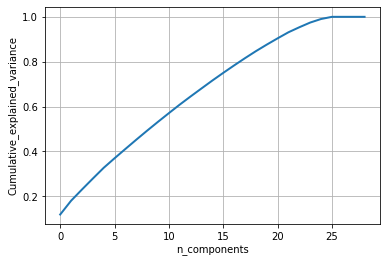

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 29
pca_data = pca.fit_transform(X_scaled)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



In [ ]:
# If we take 20-dimensions, approx. 90% of variance is expalined

### let's do classification

In [ ]:
#import lazypredict

In [ ]:
#from lazypredict.Supervised import LazyClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,target,test_size=0.2,random_state=40)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

#### random forest

In [ ]:
Rf = RandomForestClassifier(n_estimators=10, random_state=42)
Rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print('test',classification_report(y_test,Rf.predict(X_test)))
print('train',classification_report(y_train,Rf.predict(X_train)))

test               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5007
           1       0.98      0.97      0.97      1490

    accuracy                           0.99      6497
   macro avg       0.98      0.98      0.98      6497
weighted avg       0.99      0.99      0.99      6497

train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20083
           1       1.00      1.00      1.00      5904

    accuracy                           1.00     25987
   macro avg       1.00      1.00      1.00     25987
weighted avg       1.00      1.00      1.00     25987



#### logistic reg

In [ ]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('test',classification_report(y_test,lg.predict(X_test)))
print('train',classification_report(y_train,lg.predict(X_train)))

test               precision    recall  f1-score   support

           0       0.88      0.91      0.89      5007
           1       0.65      0.59      0.62      1490

    accuracy                           0.83      6497
   macro avg       0.77      0.75      0.76      6497
weighted avg       0.83      0.83      0.83      6497

train               precision    recall  f1-score   support

           0       0.88      0.90      0.89     20083
           1       0.65      0.59      0.62      5904

    accuracy                           0.83     25987
   macro avg       0.76      0.75      0.76     25987
weighted avg       0.83      0.83      0.83     25987



####  LinearDiscriminantAnalysis

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
print('test',classification_report(y_test,lda.predict(X_test)))
print('train',classification_report(y_train,lda.predict(X_train)))

test               precision    recall  f1-score   support

           0       0.90      0.89      0.90      5007
           1       0.65      0.66      0.65      1490

    accuracy                           0.84      6497
   macro avg       0.77      0.78      0.77      6497
weighted avg       0.84      0.84      0.84      6497

train               precision    recall  f1-score   support

           0       0.90      0.89      0.89     20083
           1       0.64      0.66      0.65      5904

    accuracy                           0.84     25987
   macro avg       0.77      0.78      0.77     25987
weighted avg       0.84      0.84      0.84     25987



#### QuadraticDiscriminantAnalysis

In [ ]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
print('test',classification_report(y_test,qda.predict(X_test)))
print('train',classification_report(y_train,qda.predict(X_train)))

test               precision    recall  f1-score   support

           0       0.98      0.40      0.57      5007
           1       0.33      0.97      0.49      1490

    accuracy                           0.53      6497
   macro avg       0.65      0.69      0.53      6497
weighted avg       0.83      0.53      0.55      6497

train               precision    recall  f1-score   support

           0       0.98      0.39      0.56     20083
           1       0.32      0.97      0.48      5904

    accuracy                           0.52     25987
   macro avg       0.65      0.68      0.52     25987
weighted avg       0.83      0.52      0.54     25987



#### GaussianNB

In [ ]:
NB=GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print('test',classification_report(y_test,NB.predict(X_test)))
print('train',classification_report(y_train,NB.predict(X_train)))

test               precision    recall  f1-score   support

           0       0.96      0.54      0.69      5007
           1       0.38      0.93      0.54      1490

    accuracy                           0.63      6497
   macro avg       0.67      0.74      0.62      6497
weighted avg       0.83      0.63      0.66      6497

train               precision    recall  f1-score   support

           0       0.96      0.54      0.69     20083
           1       0.37      0.93      0.53      5904

    accuracy                           0.63     25987
   macro avg       0.67      0.74      0.61     25987
weighted avg       0.83      0.63      0.66     25987



#### KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
print('test',classification_report(y_test,knn.predict(X_test)))
print('train',classification_report(y_train,knn.predict(X_train)))

test               precision    recall  f1-score   support

           0       0.96      0.96      0.96      5007
           1       0.87      0.87      0.87      1490

    accuracy                           0.94      6497
   macro avg       0.91      0.91      0.91      6497
weighted avg       0.94      0.94      0.94      6497

train               precision    recall  f1-score   support

           0       0.98      0.98      0.98     20083
           1       0.95      0.95      0.95      5904

    accuracy                           0.98     25987
   macro avg       0.97      0.97      0.97     25987
weighted avg       0.98      0.98      0.98     25987



##### GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=80, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print('test',classification_report(y_test,clf.predict(X_test)))
print('train',classification_report(y_train,clf.predict(X_train)))

test               precision    recall  f1-score   support

           0       0.91      0.92      0.92      5007
           1       0.73      0.70      0.71      1490

    accuracy                           0.87      6497
   macro avg       0.82      0.81      0.82      6497
weighted avg       0.87      0.87      0.87      6497

train               precision    recall  f1-score   support

           0       0.91      0.93      0.92     20083
           1       0.74      0.71      0.72      5904

    accuracy                           0.88     25987
   macro avg       0.83      0.82      0.82     25987
weighted avg       0.87      0.88      0.87     25987



#### StackingClassifier



In [ ]:
estimators = [('Rf',RandomForestClassifier(n_estimators=10, random_state=42)),('knn', KNeighborsClassifier(n_neighbors=3))]

In [ ]:
SC = StackingClassifier(estimators=estimators, final_estimator=lg)
SC.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('Rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [ ]:
print('test',classification_report(y_test,SC.predict(X_test)))
print('train',classification_report(y_train,SC.predict(X_train)))

test               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5007
           1       0.97      0.98      0.97      1490

    accuracy                           0.99      6497
   macro avg       0.98      0.98      0.98      6497
weighted avg       0.99      0.99      0.99      6497

train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20083
           1       1.00      1.00      1.00      5904

    accuracy                           1.00     25987
   macro avg       1.00      1.00      1.00     25987
weighted avg       1.00      1.00      1.00     25987



##### Conclusion

The best model for this task is Random Forest